In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### Data Import And Data Cleaning

In [2]:
# Reading the CSV file
loan_data = pd.read_csv("loan-predictionUC.csv.")

In [3]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_data = loan_data.drop('Loan_ID', axis = 1)

In [5]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
# Checking count of null values in the dataset
loan_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Handling null values in the column 'Gender'
mode_gender = loan_data['Gender'].mode()[0]
loan_data['Gender'].fillna(mode_gender, inplace=True)

In [9]:
# Handling null values in the column 'Married'
mode_married = loan_data['Married'].mode()[0]
loan_data['Married'].fillna(mode_married, inplace=True)

In [10]:
# Defining the ordinal mapping for the "Dependents" column
dependents_mapping = {
    '0': 0,
    '1': 1,
    '2': 2,
    '3+': 3
}
loan_data['Dependents'] = loan_data['Dependents'].map(dependents_mapping)


In [11]:
# Handling null values in the column 'Dependents'
mode_dependents = loan_data['Dependents'].mode()[0]
loan_data['Dependents'].fillna(mode_dependents, inplace=True)

In [12]:
# Handling null values in the column 'Dependents'
mode_Self_Employed = loan_data['Self_Employed'].mode()[0]
loan_data['Self_Employed'].fillna(mode_dependents, inplace=True)

In [13]:
#loan_data['CoapplicantIncome'].value_counts()

In [14]:
# Handling missing values in 'LoanAmount' using median imputation
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)

In [15]:
loan_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [16]:
# Handling null values in the column 'Loan_Amount_Term'
mode_Loan_Amount_Term = loan_data['Loan_Amount_Term'].mode()[0]
loan_data['Loan_Amount_Term'].fillna(mode_Loan_Amount_Term, inplace=True)

In [17]:
loan_data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
# Handling null values in the column 'Loan_Amount_Term'
mode_Credit_History = loan_data['Credit_History'].mode()[0]
loan_data['Credit_History'].fillna(mode_Credit_History, inplace=True)

In [19]:
loan_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
loan_data['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [21]:
loan_data['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [22]:
loan_data['Dependents'].value_counts()

0.0    360
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

In [23]:
loan_data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [24]:
loan_data['Self_Employed'].value_counts()

No     500
Yes     82
0.0     32
Name: Self_Employed, dtype: int64

In [25]:
# Converting numeric value (0.0) to No
loan_data['Self_Employed'] = loan_data['Self_Employed'].replace({0.0: 'No'})

In [26]:
loan_data['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [27]:
loan_data['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [28]:
loan_data['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [29]:
loan_data['Property_Area'].value_counts()

Semiurban     220
Urban         202
Rural         179
semiurban       7
Semi-urban      6
Name: Property_Area, dtype: int64

In [30]:
# Fixing different variations of same value
loan_data['Property_Area'] = loan_data['Property_Area'].replace({'semiurban' : 'Semiurban'})
loan_data['Property_Area'] = loan_data['Property_Area'].replace({'Semi-urban' : 'Semiurban'})

In [31]:
loan_data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [32]:
loan_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

##### Exploratory Data Analysis (EDA)

In [33]:
loan_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [34]:
loan_data.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [35]:
loan_data.describe

<bound method NDFrame.describe of      Gender Married  Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No         0.0      Graduate            No             5849   
1      Male     Yes         1.0      Graduate            No             4583   
2      Male     Yes         0.0      Graduate           Yes             3000   
3      Male     Yes         0.0  Not Graduate            No             2583   
4      Male      No         0.0      Graduate            No             6000   
..      ...     ...         ...           ...           ...              ...   
609  Female      No         0.0      Graduate            No             2900   
610    Male     Yes         3.0      Graduate            No             4106   
611    Male     Yes         1.0      Graduate            No             8072   
612    Male     Yes         2.0      Graduate            No             7583   
613  Female      No         0.0      Graduate           Yes             4583   

     

In [36]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 57.7+ KB


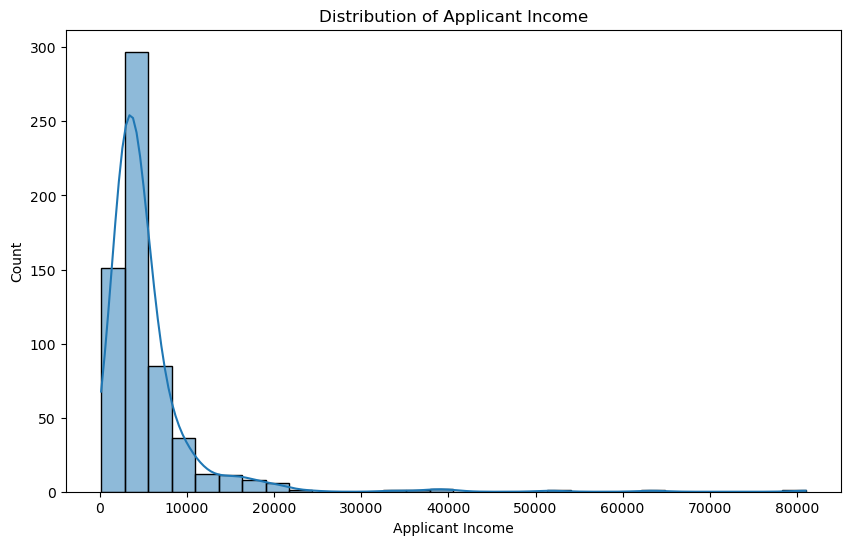

In [37]:
# Plot to show distribution of 'ApplicantIncome'
plt.figure(figsize=(10, 6))
sns.histplot(loan_data['ApplicantIncome'], bins=30, kde=True)
plt.xlabel('Applicant Income')
plt.ylabel('Count')
plt.title('Distribution of Applicant Income')
plt.show()

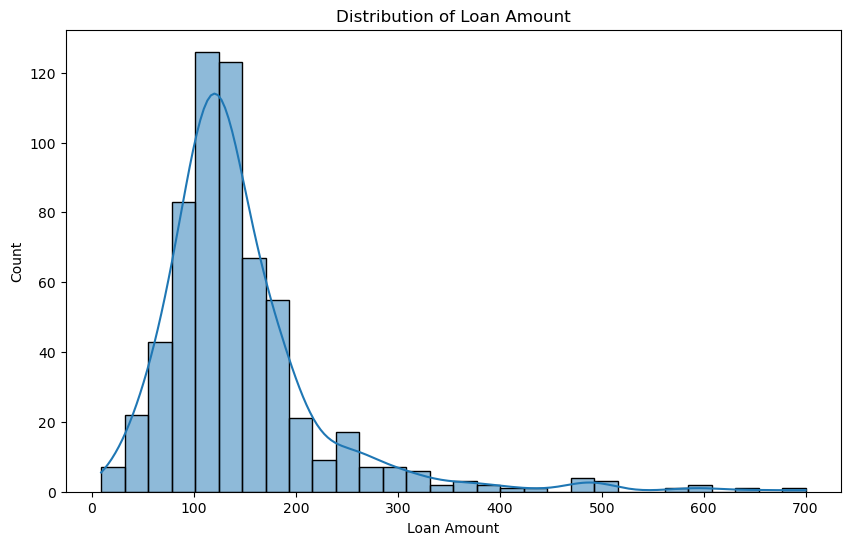

In [38]:
# Plot to show distribution of 'LoanAmount'
plt.figure(figsize=(10, 6))
sns.histplot(loan_data['LoanAmount'], bins=30, kde=True)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount')
plt.show()

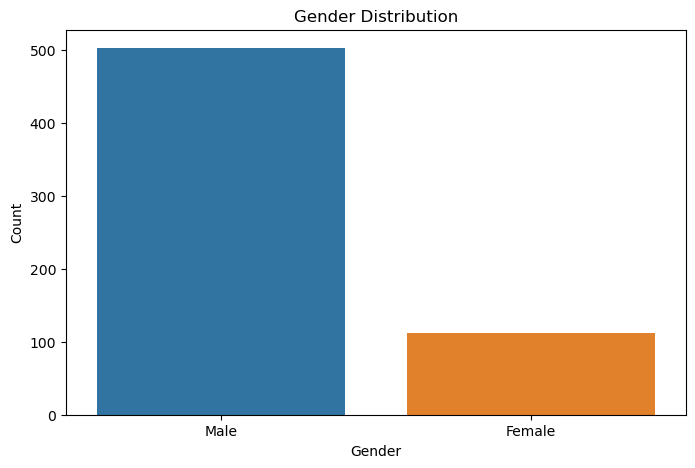

In [39]:
# Plot of 'Gender'
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=loan_data)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

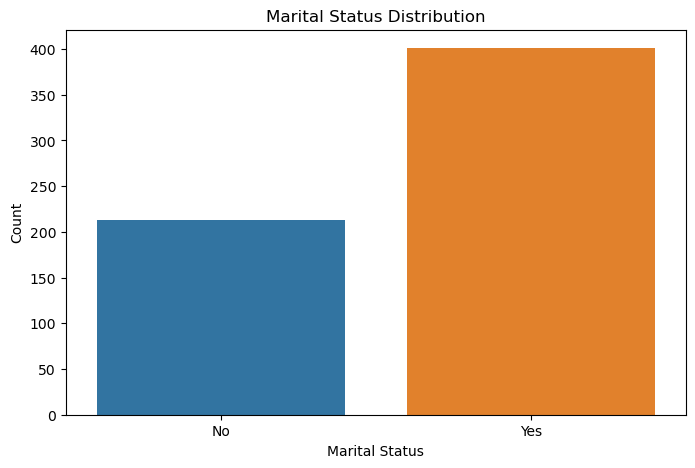

In [40]:
# Plot for 'Married'
plt.figure(figsize=(8, 5))
sns.countplot(x='Married', data=loan_data)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')
plt.show()

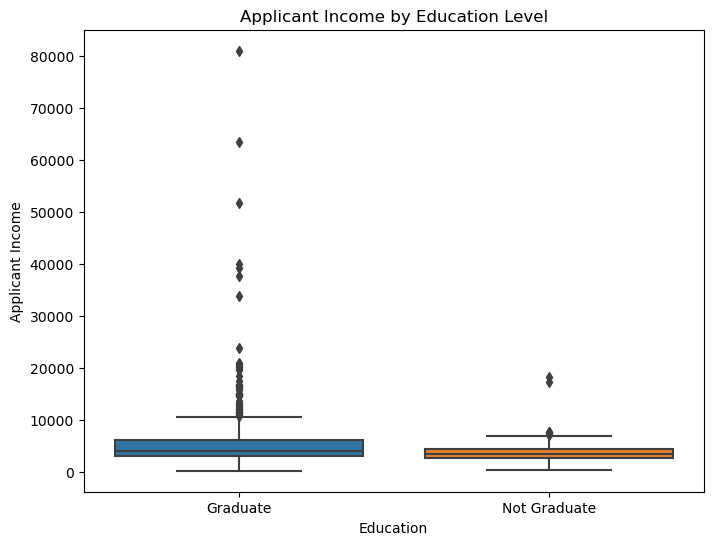

In [41]:
# 'ApplicantIncome' vs 'Education' (Box-Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Education', y='ApplicantIncome', data=loan_data)
plt.xlabel('Education')
plt.ylabel('Applicant Income')
plt.title('Applicant Income by Education Level')
plt.show()

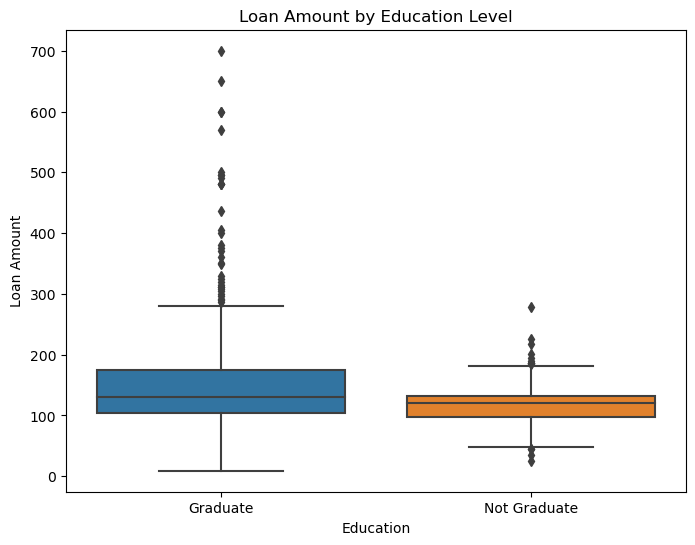

In [42]:
#'LoanAmount' vs 'Education' (Box-Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Education', y='LoanAmount', data=loan_data)
plt.xlabel('Education')
plt.ylabel('Loan Amount')
plt.title('Loan Amount by Education Level')
plt.show()

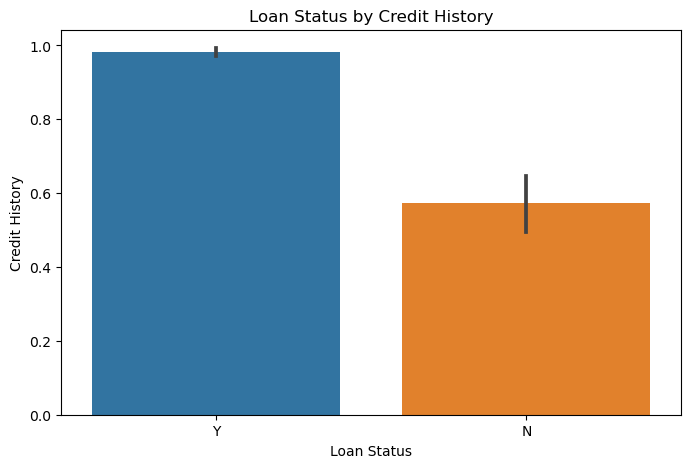

In [43]:
# Bar plot of 'Loan_Status' vs 'Credit_history'
plt.figure(figsize=(8, 5))
sns.barplot(x='Loan_Status', y='Credit_History', data=loan_data)
plt.xlabel('Loan Status')
plt.ylabel('Credit History')
plt.title('Loan Status by Credit History')
plt.show()

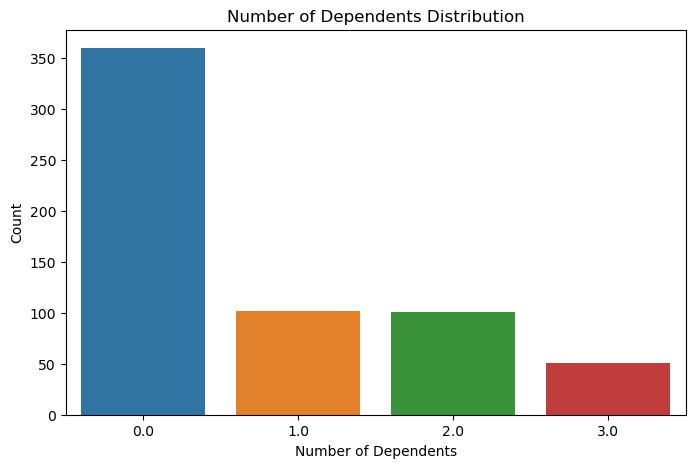

In [44]:
# Count plot of 'Dependents'
plt.figure(figsize=(8, 5))
sns.countplot(x='Dependents', data=loan_data)
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.title('Number of Dependents Distribution')
plt.show()

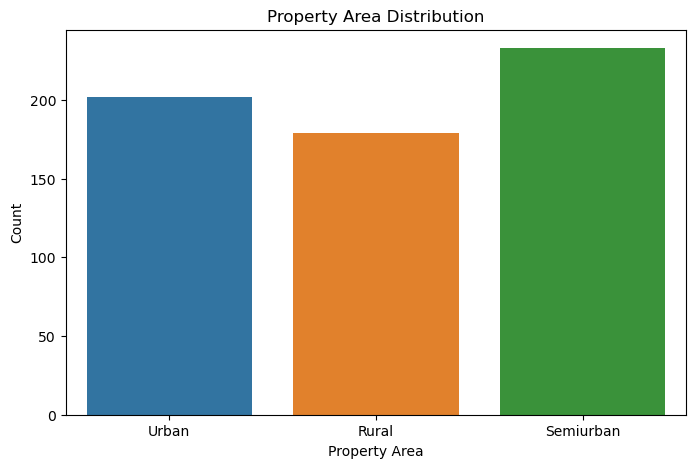

In [45]:
# Count plot of 'Property_area'
plt.figure(figsize=(8, 5))
sns.countplot(x='Property_Area', data=loan_data)
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.title('Property Area Distribution')
plt.show()

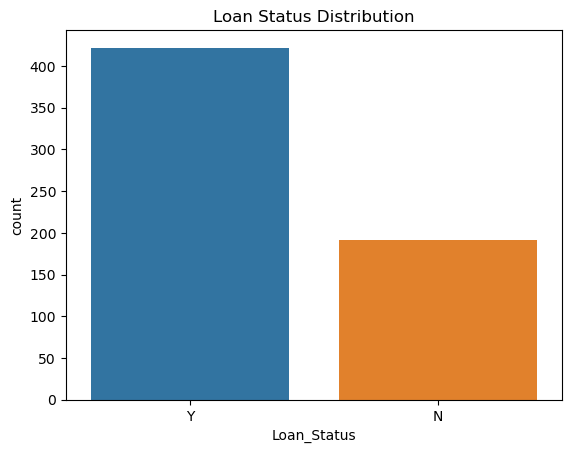

In [46]:
sns.countplot(x='Loan_Status', data=loan_data)
plt.title('Loan Status Distribution')
plt.show()

C:\Users\ratik\AppData\Local\Temp\ipykernel_6836\2560210134.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = loan_data.corr()


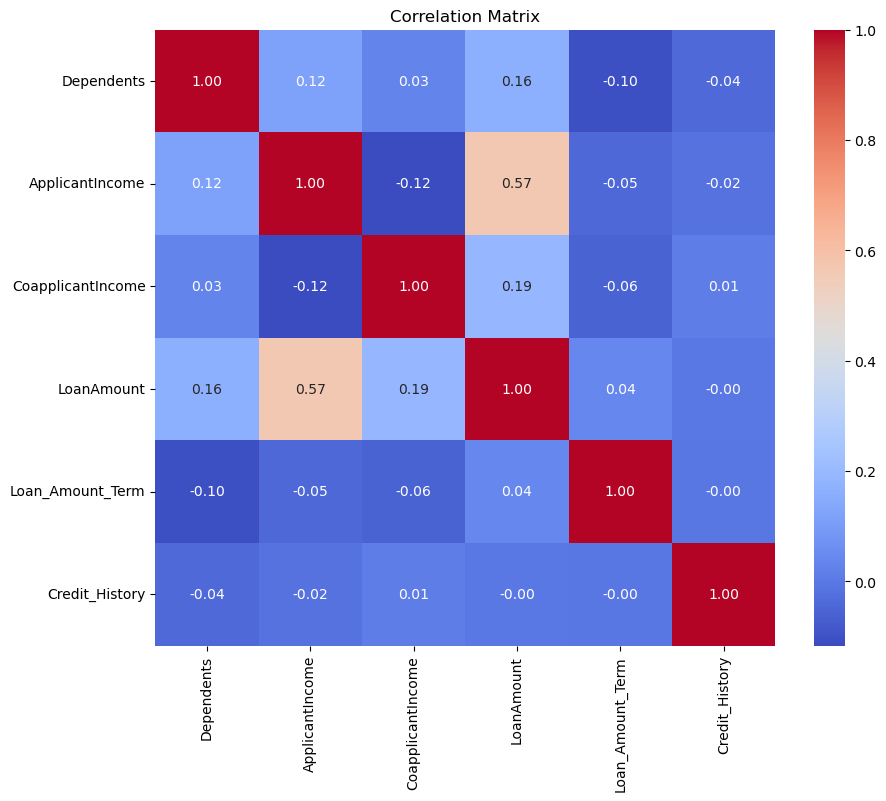

In [47]:
# Calculation of the correlation matrix
correlation_matrix = loan_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [48]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##### Encoding String contained categorical values

In [49]:
encoding = {'No': 0, 'Yes': 1, 'N' : 0, 'Y' : 1, 'Female': 0, 'Male': 1, 'Urban': 11, 'Rural' : 22, 'Semiurban' : 33, 'Graduate' : 0, 'Not Graduate' : 1}

In [50]:
loan_data['Gender'] = loan_data['Gender'].map(encoding)

In [51]:
loan_data['Married'] = loan_data['Married'].map(encoding)

In [52]:
loan_data['Self_Employed'] = loan_data['Self_Employed'].map(encoding)

In [53]:
loan_data['Education'] = loan_data['Education'].map(encoding)

In [54]:
loan_data['Property_Area'] = loan_data['Property_Area'].map(encoding)

In [55]:
loan_data['Loan_Status'] = loan_data['Loan_Status'].map(encoding)

In [56]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 57.7 KB


##### Model Selection, Training And Testing

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [58]:
# Splitting dataset into X(Features) and y(Target) 
X = loan_data.drop(columns = ['Loan_Status'])
y = loan_data['Loan_Status']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [60]:
loan_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

##### Checking for Logistic Regression

In [61]:
model = LogisticRegression()

In [62]:
model.fit(X_train, y_train)

C:\Users\ratik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [64]:
test_accuracy = accuracy_score(y_test, y_test_pred)

In [65]:
print("Test Accuracy using Logistic regression:", test_accuracy)

Test Accuracy using Logistic regression: 0.7479674796747967


In [66]:
# Confusion matrix for Logistic Regression
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix for Logistic Regression :\n", test_conf_matrix)

Confusion Matrix for Logistic Regression :
 [[12 31]
 [ 0 80]]


##### Checking for Decision Tree

In [67]:
model = DecisionTreeClassifier()

In [68]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [69]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [70]:
test_accuracy = accuracy_score(y_test, y_test_pred)

In [71]:
print("Test Accuracy using Decision Tree:", test_accuracy)

Test Accuracy using Decision Tree: 0.6991869918699187


In [72]:
# Confusion matrix for Decision Tree
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix for Decision Tree :\n", test_conf_matrix)

Confusion Matrix for Decision Tree :
 [[19 24]
 [13 67]]


##### Checking for Random Forest

In [73]:
model = RandomForestClassifier()

In [74]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [76]:
test_accuracy = accuracy_score(y_test, y_test_pred)

In [77]:
print("Test Accuracy using Random Forest :", test_accuracy)

Test Accuracy using Random Forest : 0.7723577235772358


In [78]:
# Confusion matrix for Random Forest 
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix for Random Forest :\n", test_conf_matrix)

Confusion Matrix for Random Forest :
 [[18 25]
 [ 3 77]]


### Conclusion:
The Random Forest Algorithm outperformed the other algorithms in this project, though improvements in efficiency and robustness are possible with further optimization and hyperparameter tuning. The dataset was prepared by handling missing values, encoding categorical variables, and splitting it into training and test sets. Visualizations provided valuable insights into attribute relationships. The Random Forest model showed promising results, achieving high accuracy on test dataset. The confusion matrix highlighted performance strengths and misclassifications. Future enhancements may involve advanced feature engineering, addressing class imbalances, and exploring other ensemble or deep learning algorithms. More diverse and comprehensive data could boost real-world loan application predictions. Overall, the project lays a foundation for sophisticated models benefiting financial institutions in automating loan approvals.